In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']


In [58]:
df = pd.read_csv('../input/train.csv')


In [59]:
df.shape

(1460, 81)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [61]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,...,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [63]:
# will drop the Id column as it don't serve any value in the addition
df.drop('Id', axis=1, inplace=True)

#### Sale Price is the dependent variable

#### Checking for null values

In [64]:
df.isnull().values.any()

True

In [65]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [66]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [67]:
def PercentageMissin(Dataset):
    """this function will return the percentage of missing values in a dataset """
    if isinstance(Dataset,pd.DataFrame):
        adict={} #a dictionary conatin keys columns names and values percentage of missin value in the columns
        for col in Dataset.columns:
            adict[col]=(np.count_nonzero(Dataset[col].isnull())*100)/len(Dataset[col])
        return pd.DataFrame(adict,index=['% of missing'],columns=adict.keys())
    else:
        raise TypeError("can only be used with panda dataframe")

In [68]:
a = PercentageMissin(df)
a

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
% of missing,0.0,0.0,17.739726,0.0,0.0,93.767123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.547945,0.547945,0.0,0.0,0.0,2.534247,2.534247,2.60274,2.534247,0.0,2.60274,0.0,0.0,0.0,0.0,0.0,0.0,0.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.260274,5.547945,5.547945,5.547945,0.0,0.0,5.547945,5.547945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.520548,80.753425,96.30137,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [70]:
b= missing_values_table(df)
b

Your selected dataframe has 80 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


#### PoolQC, MiscFeature, Alley, Fence,FireplaceQu has more then 50% null values hence will be dropping them

In [71]:
df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('FireplaceQu', axis=1, inplace=True)

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [74]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True) #null values imputation with mean value
df['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [75]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [76]:
df['GarageType'].fillna('NoGarage', inplace=True) 
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NoGarage', 'Basment',
       '2Types'], dtype=object)

In [77]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [78]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True) #null values imputation with mean value
df['GarageYrBlt'].describe()

count    1460.000000
mean     1978.506164
std        23.994583
min      1900.000000
25%      1962.000000
50%      1978.506164
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [79]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [80]:
df['GarageFinish'].fillna('Other', inplace=True) 
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'Other'], dtype=object)

In [81]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [82]:
df['GarageQual'].fillna('Other', inplace=True) 
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Other', 'Ex', 'Po'], dtype=object)

In [83]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [84]:
df['GarageCond'].fillna('Other', inplace=True) 
df['GarageCond'].unique()

array(['TA', 'Fa', 'Other', 'Gd', 'Po', 'Ex'], dtype=object)

In [85]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [86]:
df['BsmtExposure'].fillna('Other', inplace=True) 
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'Other'], dtype=object)

In [87]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [88]:
df['BsmtFinType2'].fillna('Other', inplace=True) 
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'Other', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [89]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [90]:
df['BsmtFinType1'].fillna('Other', inplace=True) 
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'Other', 'LwQ'], dtype=object)

In [91]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [93]:
df['BsmtCond'].fillna('Other', inplace=True) 
df['BsmtCond'].unique()

array(['TA', 'Gd', 'Other', 'Fa', 'Po'], dtype=object)

In [94]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [95]:
df['BsmtQual'].fillna('Other', inplace=True) 
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Other', 'Fa'], dtype=object)

In [96]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [97]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True) #null values imputation with mean value
df['MasVnrArea'].describe()

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [98]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [99]:
df['MasVnrType'].fillna('Other', inplace=True) #null values imputation with mean value
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'Other'], dtype=object)

In [100]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [101]:
df['Electrical'].fillna('Other', inplace=True) #null values imputation with mean value
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'Other'], dtype=object)

In [102]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

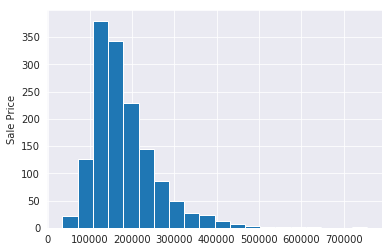

In [103]:
plt.hist(df['SalePrice'], bins=20)
plt.ylabel('Sale Price')
plt.show()

In [104]:
lnSalePrice = np.log(df['SalePrice'])

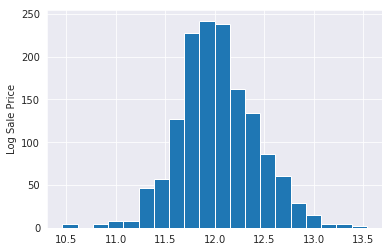

In [105]:
plt.hist(lnSalePrice, bins=20)
plt.ylabel('Log Sale Price')
plt.show()

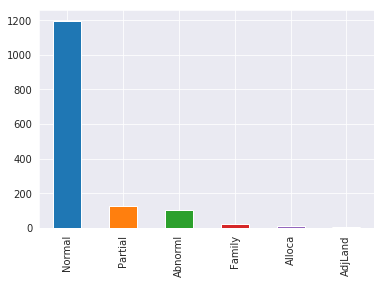

In [106]:
df['SaleCondition'].value_counts().plot.bar()

In [107]:
import seaborn as sns
sns.set_style("darkgrid")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


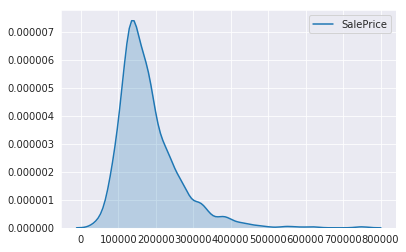

In [108]:
sns.kdeplot(df['SalePrice'],shade = True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


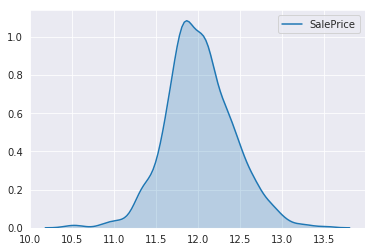

In [109]:
sns.kdeplot(lnSalePrice,shade = True)

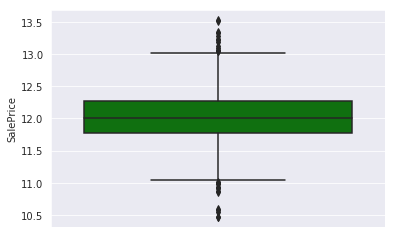

In [110]:
sns.boxplot(lnSalePrice,color="green",orient="v")

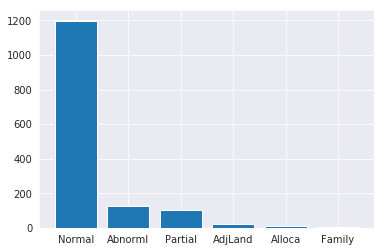

In [112]:
height = df['SaleCondition'].value_counts()
bars = df['SaleCondition'].unique()

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


In [118]:
df['MSSubClass'].describe()


count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


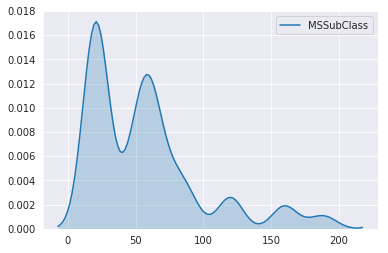

In [116]:
sns.kdeplot(df['MSSubClass'],shade = True)

In [124]:
tab = pd.crosstab(index=df["MSZoning"],  # Make a crosstab
                 columns="count")      # Name the count column

tab


col_0,count
MSZoning,
C (all),10
FV,65
RH,16
RL,1151
RM,218


In [125]:
tab/tab.sum()


col_0,count
MSZoning,
C (all),0.006849
FV,0.044521
RH,0.010959
RL,0.788356
RM,0.149315


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


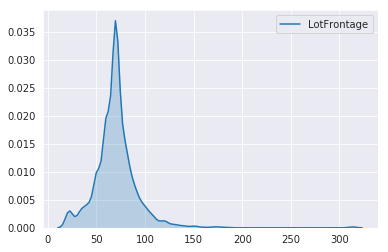

In [126]:
sns.kdeplot(df['LotFrontage'],shade = True)

In [127]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


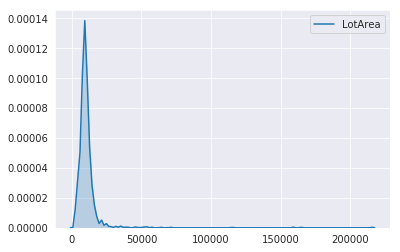

In [128]:
sns.kdeplot(df['LotArea'],shade = True)

In [129]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [130]:
tab = pd.crosstab(index=df["Street"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Street,
Grvl,0.00411
Pave,0.99589


In [131]:
df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [132]:
tab = pd.crosstab(index=df["LotShape"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
LotShape,
IR1,0.331507
IR2,0.028082
IR3,0.006849
Reg,0.633562


In [133]:
tab = pd.crosstab(index=df["LandContour"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
LandContour,
Bnk,0.043151
HLS,0.034247
Low,0.024658
Lvl,0.897945


In [134]:
tab = pd.crosstab(index=df["Utilities"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Utilities,
AllPub,0.999315
NoSeWa,0.000685


In [135]:
tab = pd.crosstab(index=df["LotConfig"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
LotConfig,
Corner,0.180137
CulDSac,0.064384
FR2,0.032192
FR3,0.002740
Inside,0.720548


In [136]:
tab = pd.crosstab(index=df["LandSlope"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
LandSlope,
Gtl,0.946575
Mod,0.044521
Sev,0.008904


In [137]:
tab = pd.crosstab(index=df["Neighborhood"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Neighborhood,
Blmngtn,0.011644
Blueste,0.001370
BrDale,0.010959
BrkSide,0.039726
ClearCr,0.019178
CollgCr,0.102740
Crawfor,0.034932
Edwards,0.068493
Gilbert,0.054110


In [138]:
tab = pd.crosstab(index=df["Condition1"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Condition1,
Artery,0.032877
Feedr,0.055479
Norm,0.863014
PosA,0.005479
PosN,0.013014
RRAe,0.007534
RRAn,0.017808
RRNe,0.001370
RRNn,0.003425


In [139]:
tab = pd.crosstab(index=df["Condition2"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Condition2,
Artery,0.001370
Feedr,0.004110
Norm,0.989726
PosA,0.000685
PosN,0.001370
RRAe,0.000685
RRAn,0.000685
RRNn,0.001370


In [140]:
tab = pd.crosstab(index=df["BldgType"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
BldgType,
1Fam,0.835616
2fmCon,0.021233
Duplex,0.035616
Twnhs,0.029452
TwnhsE,0.078082


In [141]:
tab = pd.crosstab(index=df["HouseStyle"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
HouseStyle,
1.5Fin,0.105479
1.5Unf,0.009589
1Story,0.497260
2.5Fin,0.005479
2.5Unf,0.007534
2Story,0.304795
SFoyer,0.025342
SLvl,0.044521


In [142]:
tab = pd.crosstab(index=df["RoofStyle"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
RoofStyle,
Flat,0.008904
Gable,0.781507
Gambrel,0.007534
Hip,0.195890
Mansard,0.004795
Shed,0.001370


In [143]:
tab = pd.crosstab(index=df["RoofMatl"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
RoofMatl,
ClyTile,0.000685
CompShg,0.982192
Membran,0.000685
Metal,0.000685
Roll,0.000685
Tar&Grv,0.007534
WdShake,0.003425
WdShngl,0.004110


In [144]:
tab = pd.crosstab(index=df["Exterior1st"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Exterior1st,
AsbShng,0.013699
AsphShn,0.000685
BrkComm,0.001370
BrkFace,0.034247
CBlock,0.000685
CemntBd,0.041781
HdBoard,0.152055
ImStucc,0.000685
MetalSd,0.150685


In [145]:
tab = pd.crosstab(index=df["Exterior2nd"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Exterior2nd,
AsbShng,0.013699
AsphShn,0.002055
Brk Cmn,0.004795
BrkFace,0.017123
CBlock,0.000685
CmentBd,0.041096
HdBoard,0.141781
ImStucc,0.006849
MetalSd,0.146575


In [146]:
tab = pd.crosstab(index=df["MasVnrType"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
MasVnrType,
BrkCmn,0.010274
BrkFace,0.304795
None,0.591781
Other,0.005479
Stone,0.087671


In [147]:
tab = pd.crosstab(index=df["ExterQual"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
ExterQual,
Ex,0.035616
Fa,0.009589
Gd,0.334247
TA,0.620548


In [148]:
tab = pd.crosstab(index=df["ExterCond"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
ExterCond,
Ex,0.002055
Fa,0.019178
Gd,0.100000
Po,0.000685
TA,0.878082


In [149]:
tab = pd.crosstab(index=df["Foundation"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Foundation,
BrkTil,0.100000
CBlock,0.434247
PConc,0.443151
Slab,0.016438
Stone,0.004110
Wood,0.002055


In [150]:
tab = pd.crosstab(index=df["BsmtQual"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
BsmtQual,
Ex,0.082877
Fa,0.023973
Gd,0.423288
Other,0.025342
TA,0.444521


In [151]:
tab = pd.crosstab(index=df["BsmtCond"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
BsmtCond,
Fa,0.030822
Gd,0.044521
Other,0.025342
Po,0.001370
TA,0.897945


In [152]:
tab = pd.crosstab(index=df["BsmtExposure"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
BsmtExposure,
Av,0.151370
Gd,0.091781
Mn,0.078082
No,0.652740
Other,0.026027


In [153]:
tab = pd.crosstab(index=df["BsmtFinType1"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
BsmtFinType1,
ALQ,0.150685
BLQ,0.101370
GLQ,0.286301
LwQ,0.050685
Other,0.025342
Rec,0.091096
Unf,0.294521


In [154]:
tab = pd.crosstab(index=df["BsmtFinType2"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
BsmtFinType2,
ALQ,0.013014
BLQ,0.022603
GLQ,0.009589
LwQ,0.031507
Other,0.026027
Rec,0.036986
Unf,0.860274


In [155]:
tab = pd.crosstab(index=df["Heating"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Heating,
Floor,0.000685
GasA,0.978082
GasW,0.012329
Grav,0.004795
OthW,0.001370
Wall,0.002740


In [156]:
tab = pd.crosstab(index=df["HeatingQC"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
HeatingQC,
Ex,0.507534
Fa,0.033562
Gd,0.165068
Po,0.000685
TA,0.293151


In [157]:
tab = pd.crosstab(index=df["CentralAir"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
CentralAir,
N,0.065068
Y,0.934932


In [158]:
tab = pd.crosstab(index=df["Electrical"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Electrical,
FuseA,0.064384
FuseF,0.018493
FuseP,0.002055
Mix,0.000685
Other,0.000685
SBrkr,0.913699


In [159]:
tab = pd.crosstab(index=df["KitchenQual"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
KitchenQual,
Ex,0.068493
Fa,0.026712
Gd,0.401370
TA,0.503425


In [160]:
tab = pd.crosstab(index=df["Functional"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Functional,
Maj1,0.009589
Maj2,0.003425
Min1,0.021233
Min2,0.023288
Mod,0.010274
Sev,0.000685
Typ,0.931507


In [161]:
tab = pd.crosstab(index=df["GarageType"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
GarageType,
2Types,0.004110
Attchd,0.595890
Basment,0.013014
BuiltIn,0.060274
CarPort,0.006164
Detchd,0.265068
NoGarage,0.055479


In [162]:
tab = pd.crosstab(index=df["GarageFinish"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
GarageFinish,
Fin,0.241096
Other,0.055479
RFn,0.289041
Unf,0.414384


In [163]:
tab = pd.crosstab(index=df["GarageQual"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
GarageQual,
Ex,0.002055
Fa,0.032877
Gd,0.009589
Other,0.055479
Po,0.002055
TA,0.897945


In [166]:
tab = pd.crosstab(index=df["GarageCond"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
GarageCond,
Ex,0.001370
Fa,0.023973
Gd,0.006164
Other,0.055479
Po,0.004795
TA,0.908219


In [167]:
tab = pd.crosstab(index=df["PavedDrive"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
PavedDrive,
N,0.061644
P,0.020548
Y,0.917808


In [168]:
tab = pd.crosstab(index=df["SaleType"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
SaleType,
COD,0.029452
CWD,0.002740
Con,0.001370
ConLD,0.006164
ConLI,0.003425
ConLw,0.003425
New,0.083562
Oth,0.002055
WD,0.867808


In [169]:
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

In [172]:
tab = pd.crosstab(index=df["YrSold"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
YrSold,
2006,0.215068
2007,0.225342
2008,0.208219
2009,0.231507
2010,0.119863


In [170]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [173]:
tab = pd.crosstab(index=df["MoSold"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
MoSold,
1,0.039726
2,0.035616
3,0.072603
4,0.096575
5,0.139726
6,0.173288
7,0.160274
8,0.083562
9,0.043151


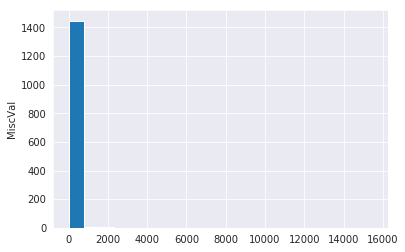

In [176]:
plt.hist(df['MiscVal'], bins=20)
plt.ylabel('MiscVal')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


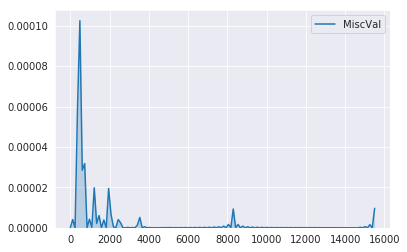

In [177]:
sns.kdeplot(df['MiscVal'],shade = True)

In [179]:
df['PoolArea'].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


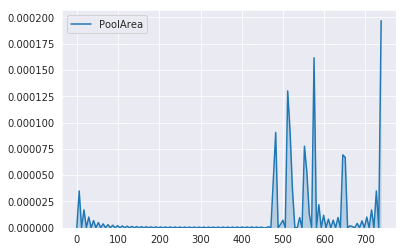

In [181]:
sns.kdeplot(df['PoolArea'],shade = True)

In [182]:
df['ScreenPorch'].describe()

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


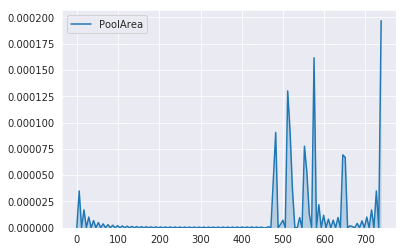

In [183]:
sns.kdeplot(df['PoolArea'],shade = True)

In [184]:
df['3SsnPorch'].describe()

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


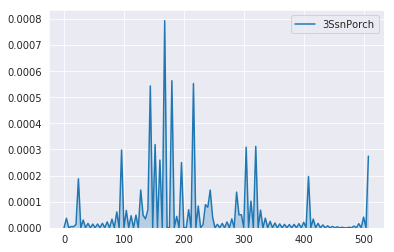

In [185]:
sns.kdeplot(df['3SsnPorch'],shade = True)

In [186]:
df['EnclosedPorch'].describe()

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


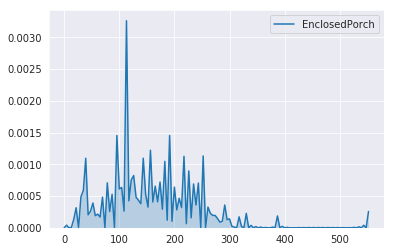

In [187]:
sns.kdeplot(df['EnclosedPorch'],shade = True)

In [188]:
df['OpenPorchSF'].describe()

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

In [189]:
df['WoodDeckSF'].describe()

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

In [190]:
df['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [194]:
df['GarageCars'].unique()

array([2, 3, 1, 0, 4])

In [195]:
tab = pd.crosstab(index=df["GarageCars"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
GarageCars,
0,0.055479
1,0.252740
2,0.564384
3,0.123973
4,0.003425


In [196]:
df['GarageYrBlt'].unique()

array([2003.        , 1976.        , 2001.        , 1998.        ,
       2000.        , 1993.        , 2004.        , 1973.        ,
       1931.        , 1939.        , 1965.        , 2005.        ,
       1962.        , 2006.        , 1960.        , 1991.        ,
       1970.        , 1967.        , 1958.        , 1930.        ,
       2002.        , 1968.        , 2007.        , 2008.        ,
       1957.        , 1920.        , 1966.        , 1959.        ,
       1995.        , 1954.        , 1953.        , 1978.50616389,
       1983.        , 1977.        , 1997.        , 1985.        ,
       1963.        , 1981.        , 1964.        , 1999.        ,
       1935.        , 1990.        , 1945.        , 1987.        ,
       1989.        , 1915.        , 1956.        , 1948.        ,
       1974.        , 2009.        , 1950.        , 1961.        ,
       1921.        , 1900.        , 1979.        , 1951.        ,
       1969.        , 1936.        , 1975.        , 1971.     

In [197]:
tab = pd.crosstab(index=df["GarageYrBlt"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
GarageYrBlt,
1900.0,0.000685
1906.0,0.000685
1908.0,0.000685
1910.0,0.002055
1914.0,0.001370
1915.0,0.001370
1916.0,0.003425
1918.0,0.001370
1920.0,0.009589


In [198]:
df['Fireplaces'].unique()

array([0, 1, 2, 3])

In [199]:
tab = pd.crosstab(index=df["Fireplaces"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
Fireplaces,
0,0.472603
1,0.445205
2,0.078767
3,0.003425


In [201]:
df['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

In [202]:
tab = pd.crosstab(index=df["TotRmsAbvGrd"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
TotRmsAbvGrd,
2,0.000685
3,0.011644
4,0.066438
5,0.188356
6,0.275342
7,0.225342
8,0.128082
9,0.051370
10,0.032192


In [203]:
df['KitchenAbvGr'].unique()

array([1, 2, 3, 0])

In [205]:
tab = pd.crosstab(index=df["KitchenAbvGr"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
KitchenAbvGr,
0,0.000685
1,0.953425
2,0.044521
3,0.001370


In [206]:
df['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

In [207]:
tab = pd.crosstab(index=df["BedroomAbvGr"],  # Make a crosstab
                 columns="count")      # Name the count column

tab/tab.sum()

col_0,count
BedroomAbvGr,
0,0.004110
1,0.034247
2,0.245205
3,0.550685
4,0.145890
5,0.014384
6,0.004795
8,0.000685


#### next complete univariate analysis for OverallQual  
OverallCond   
YearBuilt  
YearRemodAdd  
MasVnrArea     
BsmtFinSF1  
BsmtFinSF2   
BsmtUnfSF      
TotalBsmtSF   
1stFlrSF       
2ndFlrSF    
LowQualFinSF  
GrLivArea      
BsmtFullBath   
BsmtHalfBath 
FullBath     
HalfBath   